- Data Preparation
- Visualisation
- Create Train and Test Set
- Create a Logistic Regression Model
- Predictions
- Decision Boundary

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Generate data using Numpy

In [2]:
# np.random.multivariate_normal?

In [3]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1.21, 0.1], [0.1, 1.3]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_02)

[[5.63960924 4.81270654]
 [3.86141245 6.33559526]
 [3.45788128 4.6856662 ]
 [5.4942945  5.42367669]
 [3.41031756 3.66002402]
 [2.72933605 4.81396844]
 [3.62672555 5.31582993]
 [3.77498149 5.36140038]
 [4.23362958 4.17273372]
 [4.16583111 6.33756844]
 [2.9071568  6.02541455]
 [4.15254163 3.08132458]
 [5.77226839 3.94049581]
 [5.14849821 3.98692872]
 [5.36066608 5.16517038]
 [4.63413123 5.03468203]
 [5.02424959 4.67615302]
 [6.42545658 4.81197982]
 [3.68837895 5.62575271]
 [2.77212661 6.90498971]
 [5.59792138 4.74925328]
 [3.24446072 5.95121822]
 [4.68752056 6.04964147]
 [3.14274372 4.02689602]
 [5.83655403 5.16526551]
 [2.7793368  5.66458391]
 [4.89861484 4.47111506]
 [3.9709787  5.86326927]
 [1.97091935 6.98074895]
 [5.71313631 2.45176194]
 [3.00937729 4.88533621]
 [3.28738088 4.76461749]
 [5.87213827 2.78361076]
 [3.2655466  5.9800792 ]
 [4.05621639 3.82628871]
 [2.54275523 5.2612582 ]
 [3.58947077 4.99381609]
 [2.20934109 1.74643602]
 [5.7488774  7.37637078]
 [6.10129148 3.95543173]


In [4]:
print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


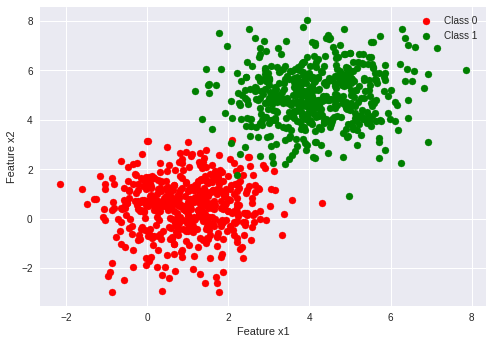

In [5]:
plt.style.use('seaborn')
plt.scatter(dist_01[:, 0], dist_01[:, 1], color = 'red', label = 'Class 0')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color = 'green', label = 'Class 1')
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend()
plt.show()

In [6]:
m = dist_01.shape[0] + dist_02.shape[0]
n = dist_01.shape[1]
data = np.zeros((m, n + 1))
data[:500, :-1] = dist_01
data[500:, :-1] = dist_02
data[500:, -1] = 1
# data[:500, -1] = 0
print(data.shape)

(1000, 3)


In [7]:
np.random.shuffle(data)
print(data[:10])

[[2.80150699 5.18514572 1.        ]
 [4.6399178  5.46843182 1.        ]
 [4.56827592 3.94526251 1.        ]
 [1.0456973  0.78668814 0.        ]
 [4.12554072 2.45649547 1.        ]
 [2.86932381 5.64984024 1.        ]
 [1.93547758 0.64559325 0.        ]
 [6.61328434 6.9279886  1.        ]
 [1.23048917 0.85722605 0.        ]
 [4.66399209 5.29130885 1.        ]]


In [8]:
split = int(0.8 * data.shape[0])

X_train = data[:split, :-1]
Y_train = data[:split, -1]
X_test = data[split:, :-1]
Y_test = data[split:, -1]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


### Plotting and normalising data

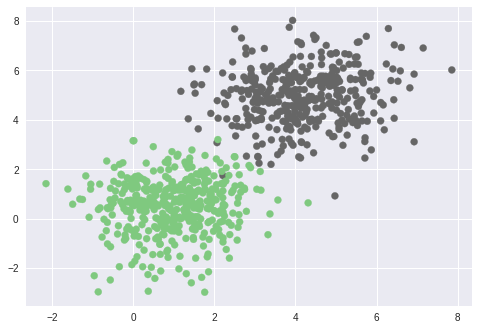

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, cmap = plt.cm.Accent)
# c is sequence of 0s and 1s. Color will be allocated acc. to sequence
plt.show()

In [10]:
# Data Normalisation

In [11]:
# x_mean = X_train.mean(axis = 0)
# x_std = X_train.std(axis = 0)

# # Apply the same Transformation on test data
# X_train = (X_train - x_mean) / x_std

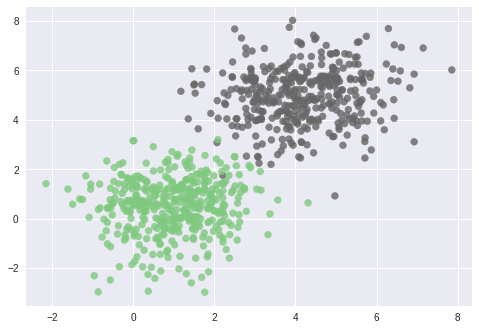

In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, cmap = plt.cm.Accent, alpha = 0.8)
plt.show()

# Logistic Regression Implementation

In [13]:
def sigmoid(x) :
    return 1.0 / (1.0 + np.exp(-1.0 * x))

In [14]:
def hypothesis(X, theta) :
    '''
        X - entire array (m, n + 1) [1s at beginning]
        theta - np.array (n + 1, 1)
    '''
    return sigmoid(np.dot(X, theta))

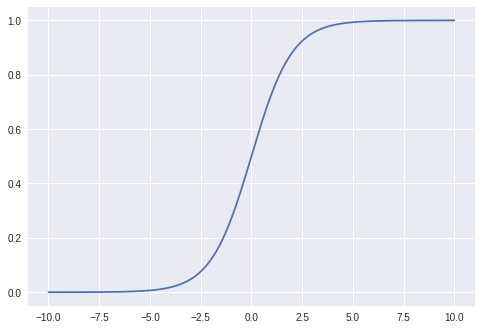

In [15]:
a = np.linspace(-10, 10, 500)
plt.plot(a, sigmoid(a))
plt.show()

In [16]:
def error(X, y, theta) :
    '''
    params :
        X - (m, n + 1)
        y - (m, 1)
        theta - (n + 1, 1)
    return :
        scalar_value = (log) loss (or binary cross entropy)
    '''
    h = hypothesis(X, theta)
    e = -1.0 * ((y * np.log(h)) + (1 - y) * (1 - np.log(h))) # element-wise multiplication
    return np.mean(e)

In [17]:
def gradient(X, y, theta) :
    '''
    params :
        X - (m, n + 1)
        y - (m, 1)
        theta - (n + 1, 1)
    return :
        gradient_vector - (n + 1, 1)
    '''
    h = hypothesis(X, theta)
    m = X.shape[0]
    grad = -1.0 * np.dot(X.T, (y - h))
    return grad / m

In [18]:
def gradient_descent(X, y, lr = 0.1, max_iter = 2000) :
    m, n = X.shape
    theta = np.zeros((n, 1))
    
    threshold = 10 ** (-3)
    
    error_list = []
    err = error(X, y, theta)
    prev = err
    error_list.append(err)
    grad = gradient(X, y, theta)
    theta = theta - lr * grad
    
    for i in range(max_iter - 1) :
        err = error(X, y, theta)
        error_list.append(err)
        grad = gradient(X, y, theta)
        theta = theta - lr * grad
        if abs(err - prev) < threshold :
            print("Stopped after " + str(i + 1) + " iterations")
            break
        prev = err
    else :
        print("Stopped after " + str(max_iter) + " iterations")
    return (theta, error_list)

In [19]:
print(X_train.shape)

(800, 2)


In [20]:
ones = np.ones((X_train.shape[0], 1))
X_new_train = np.hstack((ones, X_train))
print(X_new_train.shape)
print(X_new_train[:5])
Y_train = Y_train.reshape((-1, 1))

(800, 3)
[[1.         2.80150699 5.18514572]
 [1.         4.6399178  5.46843182]
 [1.         4.56827592 3.94526251]
 [1.         1.0456973  0.78668814]
 [1.         4.12554072 2.45649547]]


In [21]:
theta, error_list = gradient_descent(X_new_train, Y_train)

Stopped after 612 iterations


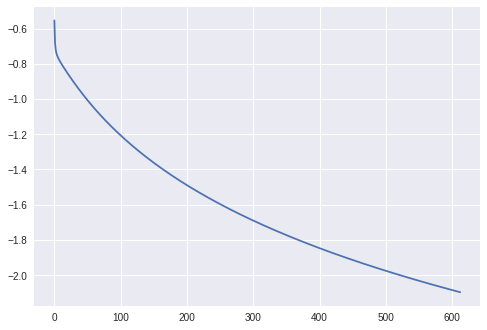

In [22]:
plt.plot(error_list)
plt.show()

In [23]:
print(theta)

[[-4.07875231]
 [ 0.53581801]
 [ 1.17881816]]


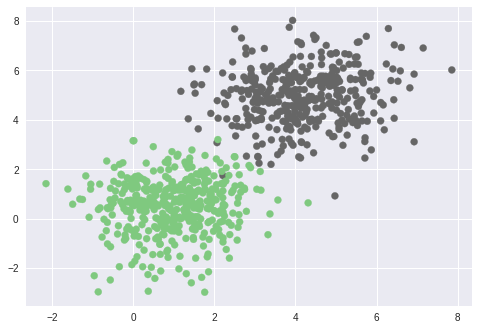

In [24]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train.reshape((-1, 1)), cmap = plt.cm.Accent)
plt.show()

theta0 + theta1 * x1 + theta2 * x2 = 0 --> for decision boundary  
=> x2(y-axis) = - (theta0 / theta2) - x1 * (theta1 / theta2)

In [25]:
x1 = np.linspace(-10, 10, 100)
x2 = -(theta[0] + theta[1] * x1) / theta[2]

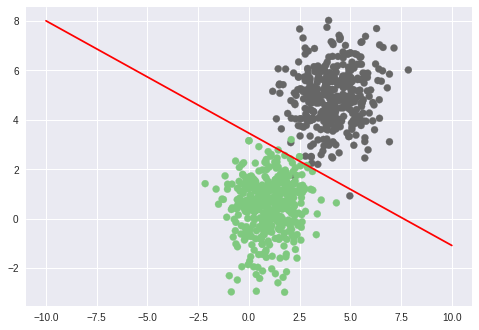

In [26]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train.reshape((-1, 1)), cmap = plt.cm.Accent)
plt.plot(x1, x2, color = 'red')
plt.show()

## Prediction and Accuracy

In [27]:
# X_test = (X_test - x_mean[:X_test.shape[0]]) / x_std[:X_test.shape[0]]
X_new_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
print(X_new_test.shape)
print(X_new_test[:3])

(200, 3)
[[1.         3.15696478 5.15577583]
 [1.         1.36775383 0.26418228]
 [1.         5.30667409 6.2851337 ]]


In [28]:
def predict(X, theta) :
    h = hypothesis(X, theta)
    # gives confidence score
    output = np.zeros(h.shape)
    output[h >= 0.5] = 1
    output = output.astype('int')
    return output

In [29]:
XT_pred = predict(X_new_train, theta)
Xt_pred = predict(X_new_test, theta)

In [30]:
def accuracy(actual, preds) :
    actual = actual.astype('int')
    return np.sum(actual == preds) / actual.shape[0] * 100

In [31]:
accuracy(Y_train, XT_pred)

99.375

In [32]:
accuracy(Y_test.reshape((Y_test.shape[0], 1)), Xt_pred)

99.5

## SkLearn

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression()

In [35]:
model.fit(X_train, Y_train.reshape((Y_train.shape[0], )))

LogisticRegression()

In [36]:
theta_0 = model.intercept_
theta_s = model.coef_
print(theta_0, theta_s)

[-12.45172112] [[2.16249108 2.67979565]]


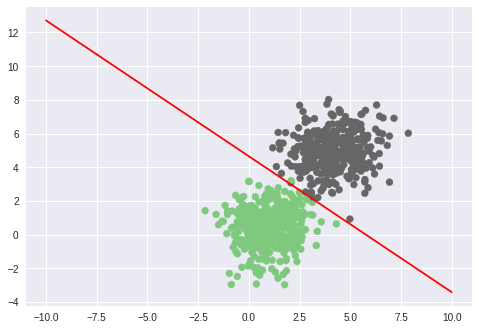

In [37]:
x1 = np.linspace(-10, 10, 50)
x2 = -(theta_0 + theta_s[0, 0] * x1) / theta_s[0, 1]
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train.reshape((-1, 1)), cmap = plt.cm.Accent)
plt.plot(x1, x2, color = 'red')
plt.show()